<a href="https://colab.research.google.com/github/fiftybucks101/Random_Forest/blob/main/Random_Forest_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore", category=UserWarning)


In [239]:
df = pd.read_csv('/content/diabetes2.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [240]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [241]:
# creating a function to return dataset size based on percentage

def df_size(df,percent):
  return df.sample(int(percent*df.shape[0]), replace=True)


In [242]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions

<Axes: >

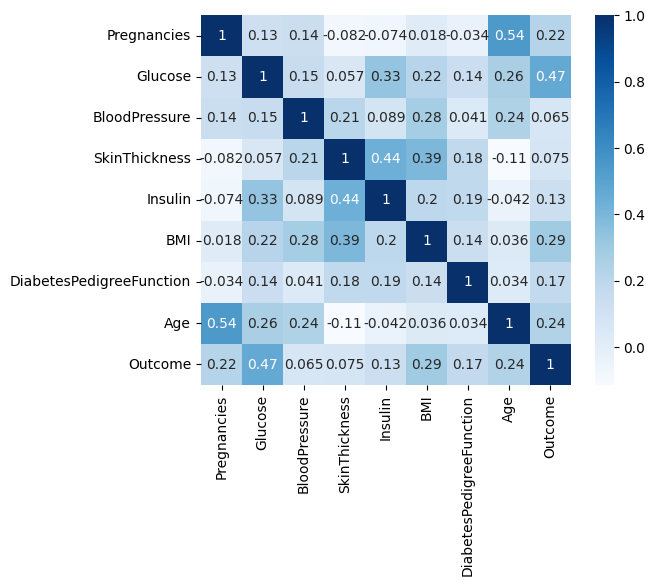

In [243]:
# let's observe correlation and extract import features

corr = df.corr()

sns.heatmap(corr,square=True,annot=True,cmap='Blues')

# Insight

* We will extract three highly correralted feature Gulcose, Pregnencies, Age

In [244]:
df = df[['Glucose','Pregnancies','Age','Outcome']]
df.head()

,Glucose,Pregnancies,Age,Outcome
0,148,6,50,1
1,85,1,31,0
2,183,8,32,1
3,89,1,21,0
4,137,0,33,1


In [245]:
# let's split df into test and train part

df_train = df.iloc[:550,:].sample(500)
print(df_train.shape)
df_test = df.iloc[550:,:]
print(df_test.shape)

(500, 4)
(218, 4)


In [246]:
# get three seperate random dataframe with replacement

df1 = df_size(df_train,0.4)
print(df1.shape)
X = df1.iloc[:,0:3]
y = df1.iloc[:,-1]
X.head()

(200, 4)


,Glucose,Pregnancies,Age
26,147,7,43
92,81,7,42
309,124,2,30
223,142,7,61
224,100,1,26


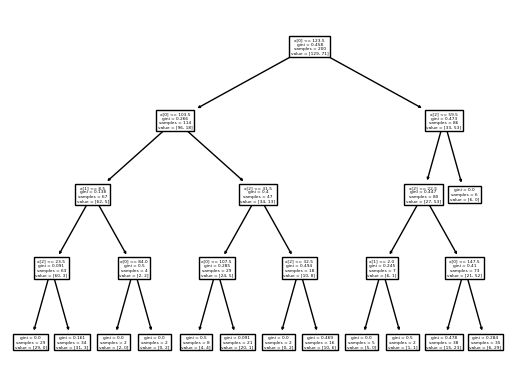

In [247]:
# training individual dataset with decision tree classifier

clf1 = DecisionTreeClassifier(max_depth=4)
clf1.fit(X,y)
plot_tree(clf1)
plt.show()

In [248]:
df2 = df_size(df_train,0.4)
df2.shape
X = df2.iloc[:,0:3]
y = df2.iloc[:,-1]



[Text(0.5119047619047619, 0.9, 'x[0] <= 157.5\ngini = 0.432\nsamples = 200\nvalue = [137, 63]'),
 Text(0.2619047619047619, 0.7, 'x[1] <= 8.5\ngini = 0.354\nsamples = 170\nvalue = [131, 39]'),
 Text(0.09523809523809523, 0.5, 'x[0] <= 103.0\ngini = 0.289\nsamples = 154\nvalue = [127, 27]'),
 Text(0.047619047619047616, 0.3, 'gini = 0.0\nsamples = 57\nvalue = [57, 0]'),
 Text(0.14285714285714285, 0.3, 'x[0] <= 146.5\ngini = 0.402\nsamples = 97\nvalue = [70, 27]'),
 Text(0.09523809523809523, 0.1, 'gini = 0.431\nsamples = 86\nvalue = [59, 27]'),
 Text(0.19047619047619047, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.42857142857142855, 0.5, 'x[2] <= 47.0\ngini = 0.375\nsamples = 16\nvalue = [4, 12]'),
 Text(0.3333333333333333, 0.3, 'x[2] <= 36.0\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.2857142857142857, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.38095238095238093, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.5238095238095238, 0.3, 'x[0]

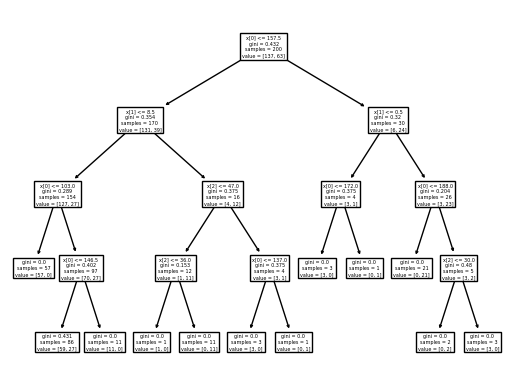

In [249]:
clf2 = DecisionTreeClassifier(max_depth=4)
clf2.fit(X,y)
plot_tree(clf2)

In [250]:
df3 = df_size(df_train,0.4)
df3.shape
X = df3.iloc[:,0:3]
y = df3.iloc[:,-1]

[Text(0.42, 0.9, 'x[0] <= 123.5\ngini = 0.474\nsamples = 200\nvalue = [123, 77]'),
 Text(0.16, 0.7, 'x[1] <= 7.5\ngini = 0.28\nsamples = 113\nvalue = [94, 19]'),
 Text(0.08, 0.5, 'x[2] <= 25.5\ngini = 0.177\nsamples = 92\nvalue = [83, 9]'),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 43\nvalue = [43, 0]'),
 Text(0.12, 0.3, 'x[0] <= 22.0\ngini = 0.3\nsamples = 49\nvalue = [40, 9]'),
 Text(0.08, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.16, 0.1, 'gini = 0.254\nsamples = 47\nvalue = [40, 7]'),
 Text(0.24, 0.5, 'x[0] <= 83.0\ngini = 0.499\nsamples = 21\nvalue = [11, 10]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.28, 0.3, 'x[2] <= 56.5\ngini = 0.484\nsamples = 17\nvalue = [7, 10]'),
 Text(0.24, 0.1, 'gini = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Text(0.32, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.68, 0.7, 'x[0] <= 157.5\ngini = 0.444\nsamples = 87\nvalue = [29, 58]'),
 Text(0.52, 0.5, 'x[0] <= 146.5\ngini = 0.5\nsamples = 47\nvalue = 

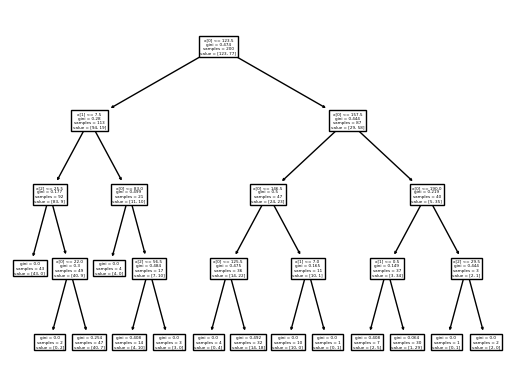

In [251]:
clf3 = DecisionTreeClassifier(max_depth=4)
clf3.fit(X,y)
plot_tree(clf3)

In [252]:
df_test.sample(5)

,Glucose,Pregnancies,Age,Outcome
677,93,0,25,0
687,107,1,29,0
739,102,1,42,1
586,143,8,41,1
579,197,2,62,1


In [253]:
# Let's predict outcome with different decision tree classifier

print('Prediction 1: ',clf1.predict(np.array([169,3,31]).reshape(1,3)))
print('Prediction 2: ',clf2.predict(np.array([169,3,31]).reshape(1,3)))
print('Prediction 3: ',clf3.predict(np.array([169,3,31]).reshape(1,3)))

Prediction 1:  [1]
Prediction 2:  [1]
Prediction 3:  [1]


In [254]:
print('Prediction 1: ',clf1.predict(np.array([126,5,40]).reshape(1,3)))
print('Prediction 2: ',clf2.predict(np.array([126,5,40]).reshape(1,3)))
print('Prediction 3: ',clf3.predict(np.array([126,5,40]).reshape(1,3)))

Prediction 1:  [1]
Prediction 2:  [0]
Prediction 3:  [1]


# Insight

* By majority of vote count, Our Outcome would be 1

In [255]:
print('Prediction 1: ',clf1.predict(np.array([126,5,40]).reshape(1,3)))
print('Prediction 2: ',clf2.predict(np.array([126,5,40]).reshape(1,3)))
print('Prediction 3: ',clf3.predict(np.array([126,5,40]).reshape(1,3)))

Prediction 1:  [1]
Prediction 2:  [0]
Prediction 3:  [1]
